# Ex 1: try to multiply two array 25 times

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0.3, 0.6, 0.1],
              [0.5, 0.2, 0.3],
              [0.4, 0.1, 0.5]])
v = np.array([1/3, 1/3, 1/3])
x = []
y = []
for i in range(25):
    v_tmp = v*A
    y.append(np.linalg.norm(v_tmp - v))
    v = v_tmp
    x.append(i)
plt.plot(x, y)
plt.show()

# Ex 2: demonstrate the central limit theorem

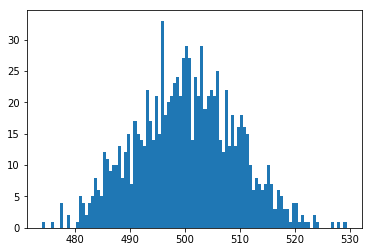

In [21]:
import numpy as np
import matplotlib.pyplot as plt

y = [np.sum(np.random.uniform(size=1000)) for i in range(1000)]
plt.hist(y, bins=100)
plt.show()

# Ex 3: plot mean image of each digit

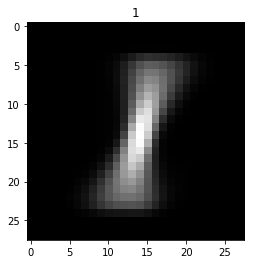

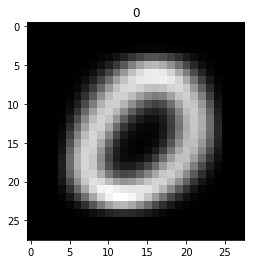

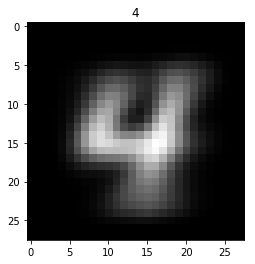

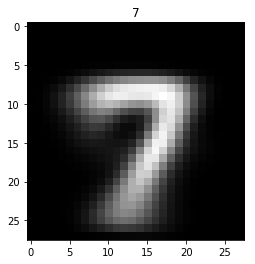

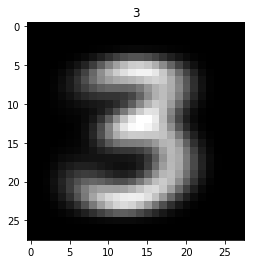

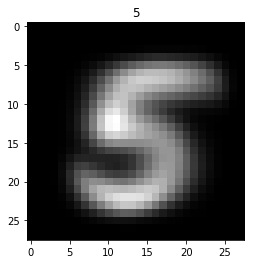

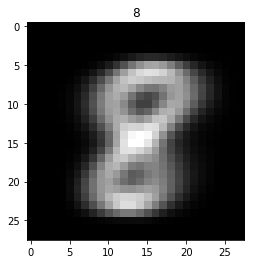

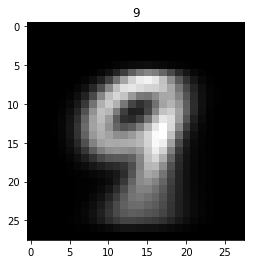

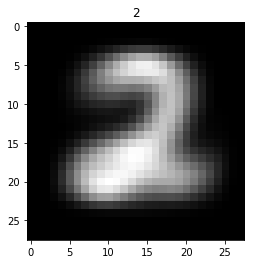

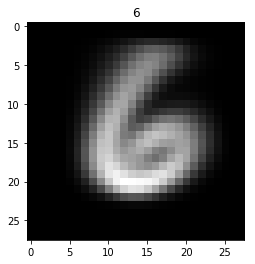

In [72]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('F:\work\eyeq\ml-course')
mnist_pd = pd.read_csv("train.csv")
mnist_np = mnist_pd.as_matrix()
mean_img_dict = {}

for idx in range(mnist_np.shape[0]):
    label = mnist_np[idx, 0]
    if label in mean_img_dict:
        mean_img_dict[label].append(mnist_np[idx, 1:])
    else:
        mean_img_dict[label] = [mnist_np[idx, 1:]]

for key, value in mean_img_dict.items():
    average_pixels = np.sum(value, axis=0) / len(value)
    image = average_pixels.reshape(28, 28)
    plt.title(key)
    plt.imshow(image, cmap='gray')
    plt.show()



# Ex 4: rotate an image by 90 degrees clockwise

for loop execution time in ms:  0.5002021789550781
numpy func execution time in ms:  55.04155158996582


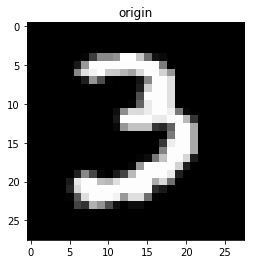

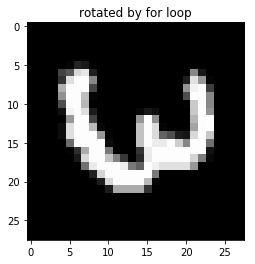

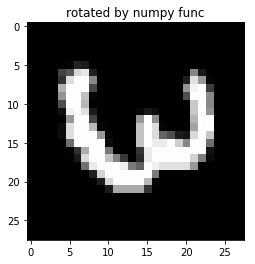

In [91]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def rotate_for_loop(image):
    rows, cols = image.shape
    new_image = np.zeros((cols, rows))
    for r_idx in range(rows):
        for c_idx in range(cols):
            new_image[c_idx, rows - 1 - r_idx] = image[r_idx, c_idx]
    return new_image

os.chdir('F:\work\eyeq\ml-course')
mnist_pd = pd.read_csv("train.csv")
mnist_np = mnist_pd.as_matrix()
# take random image
image = mnist_np[9, 1:].reshape(28,28)
# for loop method
start = time.time()
for_loop_image = rotate_for_loop(image)
end = time.time()
print('for loop execution time in ms: ', (end - start)*1000.0)
numpy_func_image = np.rot90(image, k=3)
print('numpy func execution time in ms: ', (time.time() - end)*1000.0)

plt.imshow(image, cmap='gray')
plt.title('origin')
plt.show()
plt.imshow(for_loop_image, cmap='gray')
plt.title('rotated by for loop')
plt.show()
plt.imshow(numpy_func_image, cmap='gray')
plt.title('rotated by numpy func')
plt.show()



# Ex 5: check if a matrix is symetric

In [119]:
import numpy as np
import time


def is_symetric_manual(matrix):
    rows, cols = matrix.shape
    # check if is a square matrix
    if rows != cols:
        return False
    for r_idx in range(rows):
        for c_idx in range(cols):
            if (matrix[c_idx, r_idx] - matrix[r_idx, c_idx] != 0):
                return False
    return True

def is_symetric_numpy(matrix):
    try:
        return np.equal(matrix, matrix.T).all()
    # catch the case input is not a square matrix
    except ValueError:
        return False


M = np.random.random((100,100))
start = time.time()
print(is_symetric_manual(M))
end = time.time()
print('for loop execution time in ms: ', (end - start)*1000.0)
print(is_symetric_numpy(M))
print('numpy func execution time in ms: ', (time.time() - end)*1000.0)
M = np.ones((100, 100))
start = time.time()
print(is_symetric_manual(M))
end = time.time()
print('for loop execution time in ms: ', (end - start)*1000.0)
print(is_symetric_numpy(M))
print('numpy func execution time in ms: ', (time.time() - end)*1000.0)
    

False
for loop execution time in ms:  0.0
False
numpy func execution time in ms:  0.5011558532714844
True
for loop execution time in ms:  7.025480270385742
True
numpy func execution time in ms:  0.4837512969970703


# Ex 6: generate and plot XOR dataset

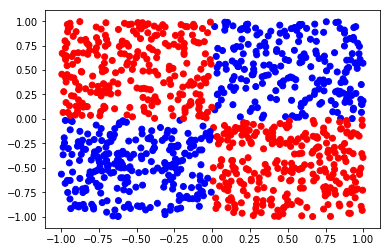

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x1s = np.random.uniform(-1, 1, 1000)
x2s = np.random.uniform(-1, 1, 1000)
color = []

for x1, x2 in zip(x1s, x2s):
    if x1 * x2 < 0:
        color.append('r')
    else:
        color.append('b')
color = np.array(color)  
plt.scatter(x1s, x2s, c=color)
plt.show()
    




# Ex 7: Donut dataset

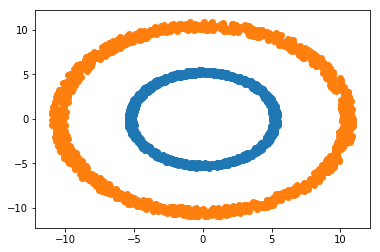

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def circle(radius):
    x = np.random.uniform(radius, radius*1.1, 1000)
    angle = np.linspace(0, 2*np.pi, 1000)
    x1s = x * np.sin(angle)
    x2s = x * np.cos(angle)
    return x1s, x2s

x1s_small, x2s_small = circle(5)
plt.scatter(x1s_small, x2s_small)
x1s_big, x2s_big = circle(10)
plt.scatter(x1s_big, x2s_big)
plt.show()


# Ex 9: save csv data with pandas

In [34]:
import numpy as np
import pandas as pd

x1s = np.random.uniform(-1, 1, 1000)
x2s = np.random.uniform(-1, 1, 1000)
color = []

for x1, x2 in zip(x1s, x2s):
    if x1 * x2 > 1:
        color.append('r')
    else:
        color.append('b')

df = pd.DataFrame({'x1': x1s.ravel(), 'x2': x2s.ravel(), 'color': color})
df.info()
df.to_csv('XOR_dataset.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
color    1000 non-null object
x1       1000 non-null float64
x2       1000 non-null float64
dtypes: float64(2), object(1)
memory usage: 23.5+ KB
